In [41]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

Wczytujemy dane, które ręcznie zostały podzielone na dane testowe i treningowe. Zostały one zaimportowane z poprzedniego notatnika, zatem zostały uprzednio odpowiednio "oczyszczone" oraz znormalizowane.

In [42]:
data_train = pd.read_csv('./sdata_train.csv', delimiter=';')
data_train.describe()

,age,sex,bmi,children,smoker,charges,southwest,northwest,southeast,northeast
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,0.029778,-0.001561,0.032653,-0.013078,0.196393,-0.014868,0.244489,0.230461,0.278557,0.246493
std,1.008642,1.000484,0.987219,0.994103,0.397468,1.001754,0.429999,0.421339,0.448514,0.431185
min,-1.509965,-0.989591,-2.446612,-0.908614,0.000000,-1.728485,0.000000,0.000000,0.000000,0.000000
25%,-0.869155,-0.989591,-0.660057,-0.908614,0.000000,-0.870756,0.000000,0.000000,0.000000,0.000000
50%,0.056461,-0.989591,-0.006819,-0.078767,0.000000,-0.014323,0.000000,0.000000,0.000000,0.000000
75%,0.910875,1.010519,0.688804,0.751079,0.000000,0.834343,0.000000,0.000000,1.000000,0.000000
max,1.765289,1.010519,3.281680,3.240619,1.000000,1.730911,1.000000,1.000000,1.000000,1.000000


In [43]:
data_test = pd.read_csv('./sdata_test.csv', delimiter=';')
data_test.describe()

,age,sex,bmi,children,smoker,charges,southwest,northwest,southeast,northeast
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,-0.087408,0.004581,-0.095848,0.038388,0.229412,0.043641,0.238235,0.276471,0.255882,0.229412
std,0.971893,1.001511,1.033558,1.019068,0.421074,0.996500,0.426632,0.447911,0.436999,0.421074
min,-1.509965,-0.989591,-2.304320,-0.908614,0.000000,-1.720716,0.000000,0.000000,0.000000,0.000000
25%,-1.011557,-0.989591,-0.818367,-0.908614,0.000000,-0.819616,0.000000,0.000000,0.000000,0.000000
50%,-0.085942,-0.989591,-0.122510,-0.078767,0.000000,0.084073,0.000000,0.000000,0.000000,0.000000
75%,0.768473,1.010519,0.519468,0.751079,0.000000,0.949570,0.000000,1.000000,1.000000,0.000000
max,1.765289,1.010519,3.739345,3.240619,1.000000,1.728322,1.000000,1.000000,1.000000,1.000000


In [44]:
print(data_test["age"].count() / data_train["age"].count())

0.3406813627254509


Dane zostały podzielone ręcznie na zbiór treningowy i testowy. Danych testowych jest 34%.

# UCZENIE MODELI

W zadaniu zdecydowaliśmy użyć 4 różnych regresorów:


*   Linear Regression
*   Decision Tree Regressor
*   Random Forest Regressor
*   Gradient Boosting Regressor



In [45]:
X = data_train[['age', 'bmi', 'sex' ,'smoker', 'children', 'southwest', 'northwest', 'southeast', 'northeast']]

y = data_train['charges']

model = LinearRegression()
model.fit(X,y)

dtr1 = DecisionTreeRegressor(max_depth=8, random_state=1)
dtr1.fit(X,y)

rfr = RandomForestRegressor(max_depth=8, random_state=0)
rfr.fit(X,y)

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X,y)

models_score = [["Linear", model.score(X,y)],
        ["Decision Tree", dtr1.score(X,y)],
        ["Random Forrest", rfr.score(X,y)],
        ["Gradient Boosting", gbr.score(X,y)]]

pd.DataFrame(models_score, columns=["Regresor", "Score (R1)"])

,Regresor,Score (R1)
0,Linear,0.781929
1,Decision Tree,0.905875
2,Random Forrest,0.928390
3,Gradient Boosting,0.887734


# TWORZENIE PREDYKCJI

In [46]:
X = data_test[['age', 'bmi', 'sex' ,'smoker', 'children', 'southwest', 'northwest', 'southeast', 'northeast']]
y_true = data_test['charges']
lr_y_pred = model.predict(X)

dtr_y_pred = dtr1.predict(X)

rfr_y_pred = rfr.predict(X)

gbr_y_pred = gbr.predict(X)


# OBLICZANIE WARTOŚCI

In [47]:
def MSE(y_true, y_pred):
  result = 0
  for i, j in zip(y_true, y_pred):
    result = result + abs(i-j)**2
  return result / len (y_true) 

def MAE(y_true, y_pred):
  result = 0;
  for i, j in zip(y_true, y_pred):
    result = result + abs(i-j)
  return result / len (y_true) 

In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

df_model_values_base = pd.DataFrame([], columns = ['Model' , 'R2', 'Wariancja wyjaśniona' , 'MSE', 'MAE'])

def count_values(y_pred, algorith_name):
  list = [[algorith_name, r2_score(y_true, y_pred), explained_variance_score(y_true, y_pred), mean_squared_error(y_true, y_pred), MSE(y_true, y_pred), mean_absolute_error(y_true, y_pred), MAE(y_true, y_pred)]]
  return list;

df_model_values_base = df_model_values_base.append(pd.DataFrame(count_values(lr_y_pred, "Linear regression"), columns=['Model' , 'R2', 'Wariancja wyjaśniona' , 'MSE', 'MSE (wlasna funkcja)', 'MAE', 'MAE (wlasna funkcja)']),ignore_index = True)
df_model_values_base = df_model_values_base.append(pd.DataFrame(count_values(dtr_y_pred, "Decison tree regression"), columns=['Model' , 'R2', 'Wariancja wyjaśniona' , 'MSE', 'MSE (wlasna funkcja)' ,'MAE', 'MAE (wlasna funkcja)']),ignore_index = True)
df_model_values_base = df_model_values_base.append(pd.DataFrame(count_values(rfr_y_pred, "Random forrest regression"), columns=['Model' , 'R2', 'Wariancja wyjaśniona' , 'MSE', 'MSE (wlasna funkcja)', 'MAE', 'MAE (wlasna funkcja)']),ignore_index = True)
df_model_values_base = df_model_values_base.append(pd.DataFrame(count_values(gbr_y_pred, "Gradient Boosting Regression"), columns=['Model' , 'R2', 'Wariancja wyjaśniona' , 'MSE', 'MSE (wlasna funkcja)', 'MAE', 'MAE (wlasna funkcja)']),ignore_index = True)

display(df_model_values_base)


,Model,R2,Wariancja wyjaśniona,MSE,MAE,MSE (wlasna funkcja),MAE (wlasna funkcja)
0,Linear regression,-0.450444,-0.445066,1.436072,0.879166,1.436072,0.879166
1,Decison tree regression,-0.649384,-0.644501,1.633041,0.887139,1.633041,0.887139
2,Random forrest regression,-0.576588,-0.572388,1.560966,0.863238,1.560966,0.863238
3,Gradient Boosting Regression,-0.566988,-0.560972,1.551461,0.851323,1.551461,0.851323


Widać, że przy wykorzystaniu własnych funkcji wartości błędów MSE oraz MAE zwracają niemal identyczne wyniki.

# WALIDACJA KRZYŻOWA

In [49]:
from sklearn.model_selection import cross_validate

X = data_train[['age', 'bmi', 'sex' ,'smoker', 'children', 'southwest', 'northwest', 'southeast', 'northeast']]
y = data_train['charges']

def k_fold_cross_validation(xtrain, ytrain, mod, k):

  combine_data = pd.concat([xtrain,ytrain],ignore_index=True,axis=1)
  folds = np.array_split(combine_data, k)
  m,n = np.shape(combine_data)
  
  cv_results = []

  for i in range(k): 
    train_index = [i for i in range(k)] 
    del train_index[i] 
    train_partitions = [folds[j] for j in train_index]  
    training_set = pd.concat(train_partitions,axis=0)
    test_set = pd.DataFrame(folds[i])
        
    train_x = training_set.iloc[:, 0:n-1]
    train_y = training_set.iloc[:,-1]
    test_x = test_set.iloc[:, 0:n-1]
    test_y = test_set.iloc[:,-1]

    mod.fit(train_x, train_y)
    predictions = mod.predict(test_x)
    error = explained_variance_score(test_y,predictions)
        
    cv_results.append(error)

  return(np.mean(cv_results)) 

models_k_fold = [["Linear", k_fold_cross_validation(X,y,model,5), k_fold_cross_validation(X,y,model,10), np.mean(cross_validate(model, X, y, cv=10)['test_score'])],
        ["Decision Tree", k_fold_cross_validation(X,y,dtr1,5), k_fold_cross_validation(X,y,dtr1,10), np.mean(cross_validate(dtr1, X, y, cv=10)['test_score'])],
        ["Random Forrest", k_fold_cross_validation(X,y,rfr,5), k_fold_cross_validation(X,y,rfr,10), np.mean(cross_validate(rfr, X, y, cv=10)['test_score'])],
        ["Gradient Boosting", k_fold_cross_validation(X,y,gbr,5), k_fold_cross_validation(X,y,gbr,10), np.mean(cross_validate(gbr, X, y, cv=10)['test_score'])]]

pd.DataFrame(models_k_fold, columns=["Model", "Walidacja krzyżowa (k=5)", "Walidacja krzyżowa (k=10)", "Wartość liczona funkcją sklearn (k=5)"])

,Model,Walidacja krzyżowa (k=5),Walidacja krzyżowa (k=10),Wartość liczona funkcją sklearn (k=5)
0,Linear,0.778289,0.777208,0.774096
1,Decision Tree,0.731023,0.747060,0.741721
2,Random Forrest,0.810829,0.816084,0.812351
3,Gradient Boosting,0.829874,0.833856,0.830809


Widać, że wartości liczone własną funkcją sa bardzo zbliżone do wyników wykorzystujących metodę do obliczadania walidacji krzyżowej z biblioteki sklearn.

Na podstawie przeprowadzonych badań można powiedzieć, że każdy z wykorzystanych regresorów dość dobrze przewiduje cenę ubezpieczenia w zależności od wybranych parametrów.

Najlepszym modelem na podstawie walidacji krzyżowej okazuje się model wykorzystujacy regresor Gradient Boosting.



In [50]:
from mlxtend.regressor import StackingCVRegressor
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

x_train = data_train[['age', 'bmi', 'sex' ,'smoker', 'children', 'southwest', 'northwest', 'southeast', 'northeast']]
y_train = data_train['charges']
x_test = data_test[['age', 'bmi', 'sex' ,'smoker', 'children', 'southwest', 'northwest', 'southeast', 'northeast']]
y_test = data_test['charges']

stackingModel = StackingCVRegressor(regressors = (DecisionTreeRegressor(),
                                                  RandomForestRegressor(),
                                                  GradientBoostingRegressor()),
                                    meta_regressor = LinearRegression(),
                                    cv = 10, use_features_in_secondary = True,
                                    store_train_meta_features = True,
                                    shuffle = False)
sm = stackingModel.fit(x_train,y_train)
pred = sm.predict(x_test)

df_model_values_base = df_model_values_base.append(pd.DataFrame(count_values(pred, "StackingCVRegressor"), columns=['Model' , 'R2', 'Wariancja wyjaśniona' , 'MSE', 'MSE (wlasna funkcja)', 'MAE', 'MAE (wlasna funkcja)']),ignore_index = True)
display(df_model_values_base)

,Model,R2,Wariancja wyjaśniona,MSE,MAE,MSE (wlasna funkcja),MAE (wlasna funkcja)
0,Linear regression,-0.450444,-0.445066,1.436072,0.879166,1.436072,0.879166
1,Decison tree regression,-0.649384,-0.644501,1.633041,0.887139,1.633041,0.887139
2,Random forrest regression,-0.576588,-0.572388,1.560966,0.863238,1.560966,0.863238
3,Gradient Boosting Regression,-0.566988,-0.560972,1.551461,0.851323,1.551461,0.851323
4,StackingCVRegressor,-0.550487,-0.545501,1.535124,0.851935,1.535124,0.851935


# Dobór kolumn

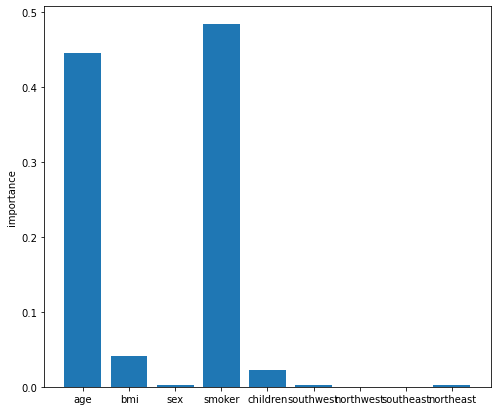

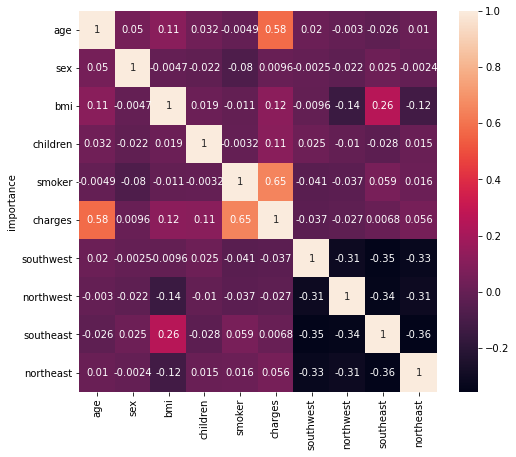

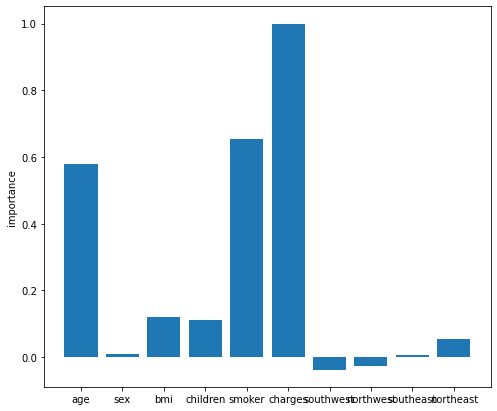

In [51]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

reg = GradientBoostingRegressor()
reg.fit(X, y)

feature_importance = reg.feature_importances_
figure(figsize=(8, 7))
plt.bar(X.columns, feature_importance)
plt.ylabel('importance')
plt.show()


figure(figsize=(8, 7))
corrMatrix = data_train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.ylabel('importance')
plt.show()

figure(figsize=(8, 7))
plt.bar(data_train.columns, corrMatrix["charges"])
plt.ylabel('importance')
plt.show()

# GridSearch

In [52]:
from sklearn.model_selection import GridSearchCV


x_train = data_train[['age', 'bmi', 'smoker', 'children']]
y_train = data_train['charges']
x_test = data_test[['age', 'bmi', 'smoker', 'children']]
y_test = data_test['charges']

regresor = GradientBoostingRegressor()

parameters = {"max_depth":[None,1,2,3,4,5,6,7,8,9,10,12,16], "min_samples_split":[2,3,4,5,6,7,8,9,10,12,16] ,"min_samples_leaf":[2,3,4,5,6,7,8,9,10,12,16]}

grid = GridSearchCV(estimator = regresor, param_grid = parameters, cv = 5, n_jobs =-1)
grid.fit(x_train,y_train)
print("najlepsze parametry: ", grid.best_params_)

najlepsze parametry:  {'max_depth': 2, 'min_samples_leaf': 16, 'min_samples_split': 2}


In [53]:
regresor = DecisionTreeRegressor()

parameters = {"max_depth":[None,1,2,3,4,5,6,7,8,9,10,12,16], "min_samples_split":[2,3,4,5,6,7,8,9,10,12,16] ,"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10,12,16]}

grid = GridSearchCV(estimator = regresor, param_grid = parameters, cv = 5, n_jobs =-1)
grid.fit(x_train,y_train)
print("najlepsze parametry: ", grid.best_params_)

najlepsze parametry:  {'max_depth': 5, 'min_samples_leaf': 16, 'min_samples_split': 2}


# TPot


In [54]:
from tpot import TPOTRegressor


pipeline_optimizer = TPOTRegressor(generations=10, population_size=20, cv=5,
                                    random_state=1, verbosity=2)

pipeline_optimizer.fit(x_train, y_train)
print(pipeline_optimizer.score(x_test, y_test))
pipeline_optimizer.export('tpot_exported_pipeline.py')


Generation 1 - Current best internal CV score: -0.17096817752714305

Generation 2 - Current best internal CV score: -0.17096817752714305

Generation 3 - Current best internal CV score: -0.1672507979698757

Generation 4 - Current best internal CV score: -0.1672507979698757

Generation 5 - Current best internal CV score: -0.1672507979698757

Generation 6 - Current best internal CV score: -0.16700588501658845

Generation 7 - Current best internal CV score: -0.16700588501658845

Generation 8 - Current best internal CV score: -0.16700588501658845

Generation 9 - Current best internal CV score: -0.16700588501658845

Generation 10 - Current best internal CV score: -0.16700588501658845

Best pipeline: RidgeCV(PolynomialFeatures(ExtraTreesRegressor(LinearSVR(input_matrix, C=1.0, dual=False, epsilon=0.01, loss=squared_epsilon_insensitive, tol=0.0001), bootstrap=True, max_features=0.2, min_samples_leaf=19, min_samples_split=18, n_estimators=100), degree=2, include_bias=False, interaction_only=Fa

In [55]:
dtr1 = DecisionTreeRegressor(max_depth=12, min_samples_leaf= 16, min_samples_split=3, random_state=1)
dtr1.fit(x_train, y_train)

df_model_values = pd.DataFrame([], columns = ['Model' , 'R2', 'Wariancja wyjaśniona' , 'MSE', 'MAE'])

pred = dtr1.predict(x_test)
df_model_values = df_model_values.append(pd.DataFrame(count_values(pred, "Decision tree regressor"), columns=['Model' , 'R2', 'Wariancja wyjaśniona' , 'MSE', 'MSE (wlasna funkcja)', 'MAE', 'MAE (wlasna funkcja)']),ignore_index = True)

,Model,R2,Wariancja wyjaśniona,MSE,MAE,MSE (wlasna funkcja),MAE (wlasna funkcja)
0,Decision tree regressor,-0.556612,-0.550236,1.541187,0.855419,1.541187,0.855419


In [56]:
dtr1 = GradientBoostingRegressor(max_depth=2, min_samples_leaf= 16, min_samples_split=2, random_state=1)
dtr1.fit(x_train, y_train)


pred = dtr1.predict(x_test)
df_model_values = df_model_values.append(pd.DataFrame(count_values(pred, "GradientBoostingRegressor"), columns=['Model' , 'R2', 'Wariancja wyjaśniona' , 'MSE', 'MSE (wlasna funkcja)', 'MAE', 'MAE (wlasna funkcja)']),ignore_index = True)

,Model,R2,Wariancja wyjaśniona,MSE,MAE,MSE (wlasna funkcja),MAE (wlasna funkcja)
0,Decision tree regressor,-0.556612,-0.550236,1.541187,0.855419,1.541187,0.855419
1,GradientBoostingRegressor,-0.523172,-0.516970,1.508079,0.840531,1.508079,0.840531


In [57]:
from sklearn.ensemble import ExtraTreesRegressor

dtr1 = ExtraTreesRegressor(bootstrap=True, max_features=0.2, min_samples_leaf=19, min_samples_split=18, n_estimators=100)
dtr1.fit(x_train, y_train)


pred = dtr1.predict(x_test)
df_model_values = df_model_values.append(pd.DataFrame(count_values(pred, "ExtraTreesRegressor"), columns=['Model' , 'R2', 'Wariancja wyjaśniona' , 'MSE', 'MSE (wlasna funkcja)', 'MAE', 'MAE (wlasna funkcja)']),ignore_index = True)
display(df_model_values)

display(df_model_values_base)

,Model,R2,Wariancja wyjaśniona,MSE,MAE,MSE (wlasna funkcja),MAE (wlasna funkcja)
0,Decision tree regressor,-0.556612,-0.550236,1.541187,0.855419,1.541187,0.855419
1,GradientBoostingRegressor,-0.523172,-0.516970,1.508079,0.840531,1.508079,0.840531
2,ExtraTreesRegressor,-0.061106,-0.057583,1.050592,0.844181,1.050592,0.844181


,Model,R2,Wariancja wyjaśniona,MSE,MAE,MSE (wlasna funkcja),MAE (wlasna funkcja)
0,Linear regression,-0.450444,-0.445066,1.436072,0.879166,1.436072,0.879166
1,Decison tree regression,-0.649384,-0.644501,1.633041,0.887139,1.633041,0.887139
2,Random forrest regression,-0.576588,-0.572388,1.560966,0.863238,1.560966,0.863238
3,Gradient Boosting Regression,-0.566988,-0.560972,1.551461,0.851323,1.551461,0.851323
4,StackingCVRegressor,-0.550487,-0.545501,1.535124,0.851935,1.535124,0.851935


# Wnioski
Do optymalizacji wykorzystaliśmy regressory Decision Tree i Gradient Boosting z których Gradient Boosting okazał się tym lepszym. Z kolei wybór najlepszego regresora z wykorzystaniem biblioteki TPot okazało się, że najlepszym regresorem jest ExtraTrees z wartością R2 = -0.52744 i najmniejszymi wartościami MSE i MAE.